In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [14]:
img = cv.imread('train/train/clips-30049.png')
cv.imshow('vacia', img)

cv.waitKey(0)

-1

In [15]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)

-1

In [16]:
sobelx1 = cv.Sobel(img, cv.CV_64F, 1, 0)
cv.imshow("sobelx",sobelx1)
cv.waitKey(0)

-1

In [13]:
sobelx2 = cv.Sobel(gray, cv.CV_64F, 1, 0)
cv.imshow("sobelx",sobelx2)
cv.waitKey(0)

-1

-1

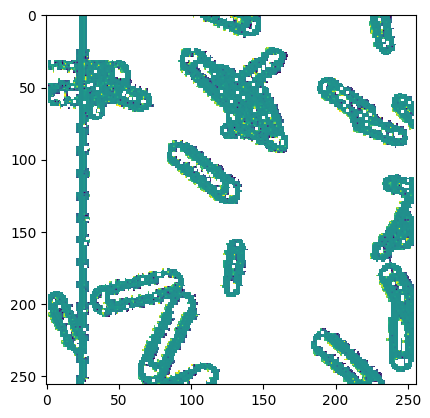

In [24]:
sobelx3 = cv.Sobel(gray, cv.CV_64F, 1, 0)
sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_not(sobelx3, sobely)
plt.imshow(combined_sobel)
cv.waitKey(0)

In [25]:
sobelx3 = cv.convertScaleAbs(sobelx3)
canny = cv.Canny(sobelx3, 0, 10)

# Aplicar un umbral adaptativo a la imagen en escala de grises
_, thresh = cv.threshold(canny, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Encontrar los contornos en la imagen binarizada
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Contar el número de contornos encontrados
num_contours = len(contours)

# Mostrar el número de contornos encontrados
print(f"Número de contornos de clips encontrados: {num_contours}")

# Dibujar los contornos en la imagen original
cv.drawContours(canny, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos dibujados
cv.imshow('Contours', img)
cv.waitKey(0)
cv.destroyAllWindows()

Número de contornos de clips encontrados: 370


In [19]:
sobelx1 = cv.convertScaleAbs(sobelx1)

In [23]:
canny = cv.Canny(sobelx1, 100, 200)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)

-1

In [43]:
# Sobel 
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
cv.imshow('Sobel Y', sobelx)
cv.waitKey(0)

-1

In [29]:
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)
cv.imshow('Blank Image', opening)
cv.waitKey(0)

-1

In [30]:
contours, _ = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
clip_count = len(contours)
print("Número de clips:", clip_count)

Número de clips: 0


In [ ]:
weird_shape = cv.bitwise_and(circle,rectangle)
cv.imshow('Weird Shape', weird_shape)

In [8]:
# Convertir la imagen a escala de grises
gray = cv.cvtColor(sobelx, cv.COLOR_BGR2GRAY)

# Aplicar un umbral adaptativo a la imagen en escala de grises
_, thresh = cv.threshold(sobelx, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Encontrar los contornos en la imagen binarizada
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Contar el número de contornos encontrados
num_contours = len(contours)

# Mostrar el número de contornos encontrados
print(f"Número de contornos de clips encontrados: {num_contours}")

# Dibujar los contornos en la imagen original
cv.drawContours(sobelx, contours, -1, (0, 255, 0), 2)

# Mostrar la imagen con los contornos dibujados
cv.imshow('Contours', img)
cv.waitKey(0)
cv.destroyAllWindows()






error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


In [27]:
import cv2 as cv
import numpy as np

# Cargar la imagen
image = cv.imread('train/train/clips-30049.png')

# Definir una máscara que cubra el objeto no deseado
# Puedes utilizar técnicas de segmentación o dibujar manualmente la máscara
mask = np.zeros(image.shape[:2], dtype=np.uint8)
cv.rectangle(mask, (x, y, width, height), 255, -1)  # Rectángulo que cubre el objeto no deseado

# Aplicar el algoritmo de inpainting
inpaint = cv.inpaint(image, mask, 3, cv.INPAINT_TELEA)

# Mostrar la imagen original y la imagen con el objeto no deseado eliminado
cv.imshow('Original', image)
cv.imshow('Inpaint', inpaint)
cv.waitKey(0)
cv.destroyAllWindows()

NameError: name 'x' is not defined

In [5]:
import cv2 as cv
import numpy as np

# Variables globales
drawing = False  # Indica si el usuario está dibujando
x_start, y_start = 10, 0  # Coordenadas de inicio del rectángulo
x_end, y_end = 40, 250  # Coordenadas finales del rectángulo

# Función de callback para eventos de ratón
def draw_rectangle(event, x, y, flags, param):
    global drawing, x_start, y_start, x_end, y_end

    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        x_start, y_start = x, y

    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        x_end, y_end = x, y
        cv.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)
        cv.imshow('Imagen', image)

# Cargar la imagen
image = cv.imread('train/train/clips-30049.png')

# Verificar si la imagen se ha cargado correctamente
if image is None:
    print("No se pudo cargar la imagen.")
    exit()

# Crear una copia de la imagen para mostrar las anotaciones
annotated_image = image.copy()

# Mostrar la imagen y esperar a que el usuario dibuje el rectángulo
cv.namedWindow('Imagen')
cv.setMouseCallback('Imagen', draw_rectangle)
cv.imshow('Imagen', image)
cv.waitKey(0)

# Verificar si se ha dibujado un rectángulo válido
if x_start != -1 and y_start != -1 and x_end != -1 and y_end != -1:
    # Crear la máscara
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    cv.rectangle(mask, (x_start, y_start), (x_end, y_end), 255, -1)

    # Aplicar el algoritmo de inpainting
    inpaint = cv.inpaint(image, mask, 3, cv.INPAINT_TELEA)

    # Mostrar la imagen original y la imagen con el objeto no deseado eliminado
    cv.imshow('Original', image)
    cv.imshow('Inpaint', inpaint)

: 

Empiezo otra vez

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [41]:
image = cv.imread('train/train/clips-30049.png')

x_start = 22
y_start = 0
x_end = 24
y_end = 256

In [42]:

# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)

sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

# Mostrar la imagen original y la imagen con la zona vertical borrada
cv.imshow('Original', image)
cv.imshow('Zona Borrada', sobelx)
cv.waitKey(0)
cv.destroyAllWindows()

In [43]:
canny = cv.Canny(sobelx, 100, 200)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)

-1

In [47]:
_, thresh = cv.threshold(canny, 0, 120, cv.THRESH_BINARY)

In [48]:
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [49]:
num_contours = len(contours)
print(f"Número de contornos encontrados: {num_contours}")

Número de contornos encontrados: 217


Todo junto

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread('train/train/clips-30048.png')

# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)

sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

canny = cv.Canny(sobelx, 100, 200)

thresh = cv.adaptiveThreshold(canny, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

#_, thresh = cv.threshold(canny, 0, 255, cv.THRESH_BINARY)

contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

#contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

num_contours = len(contours)
print(f"Número de contornos encontrados: {num_contours}")

Número de contornos encontrados: 716


In [15]:
import cv2 as cv
import numpy as np

image = cv.imread('train/train/clips-30049.png')
# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

canny = cv.Canny(sobelx, 100, 200)

# Aplicar un umbral adaptativo para obtener la imagen de contornos
thresh = cv.adaptiveThreshold(canny, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Encontrar los contornos en la imagen binaria
contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Filtrar los contornos por área
min_area = 100  # Umbral mínimo de área
max_area = 1000  # Umbral máximo de área
filtered_contours = [cnt for cnt in contours if min_area < cv.contourArea(cnt) < max_area]

# Contar el número de contornos encontrados
num_contours = len(filtered_contours)
print(f"Número de contornos encontrados: {num_contours}")

# Dibujar los contornos filtrados en la imagen original
cv.drawContours(canny, filtered_contours, -1, (0, 255, 0), 2)

cv.imshow('Canny Edges', canny)
cv.waitKey(0)

Número de contornos encontrados: 14


-1

In [16]:
import cv2 as cv
import numpy as np

image = cv.imread('train/train/clips-30049.png')
# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

canny = cv.Canny(sobelx, 100, 200)

# Aplicar un umbral adaptativo para obtener la imagen de contornos
thresh = cv.adaptiveThreshold(canny, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Encontrar los contornos en la imagen binaria
contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Filtrar los contornos por área
min_area = 10  # Umbral mínimo de área
max_area = 10000  # Umbral máximo de área
filtered_contours = [cnt for cnt in contours if min_area < cv.contourArea(cnt) < max_area]

# Contar el número de contornos encontrados
num_contours = len(filtered_contours)
print(f"Número de contornos encontrados: {num_contours}")

# Dibujar los contornos filtrados en la imagen original
cv.drawContours(canny, filtered_contours, -1, (0, 255, 0), 2)

cv.imshow('Canny Edges', canny)
cv.waitKey(0)

Número de contornos encontrados: 91


-1

In [19]:
import cv2 as cv
import numpy as np

image = cv.imread('train/train/clips-30048.png')
# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)
sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

canny = cv.Canny(sobelx, 100, 200)

# Aplicar un umbral adaptativo para obtener la imagen de contornos
thresh = cv.adaptiveThreshold(canny, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Encontrar los contornos en la imagen binaria
contours, _ = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Filtrar los contornos por área, aspect ratio y perímetro
min_area = 10  # Umbral mínimo de área
max_area = 10000  # Umbral máximo de área
min_aspect_ratio = 0.2  # Umbral mínimo de aspect ratio
max_aspect_ratio = 5.0  # Umbral máximo de aspect ratio
min_perimeter = 10  # Umbral mínimo de perímetro
filtered_contours = []
for cnt in contours:
    area = cv.contourArea(cnt)
    perimeter = cv.arcLength(cnt, True)
    if min_area < area < max_area and min_perimeter < perimeter:
        x, y, width, height = cv.boundingRect(cnt)
        aspect_ratio = width / float(height)
        if min_aspect_ratio < aspect_ratio < max_aspect_ratio:
            filtered_contours.append(cnt)

# Contar el número de contornos encontrados
num_contours = len(filtered_contours)
print(f"Número de contornos encontrados: {num_contours}")

# Dibujar los contornos filtrados en la imagen original
cv.drawContours(canny, filtered_contours, -1, (0, 255, 0), 2)

cv.imshow('Canny Edges', canny)
cv.waitKey(0)

Número de contornos encontrados: 130


-1

In [25]:
import cv2 as cv
import numpy as np

image = cv.imread('train/train/clips-30049.png')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Aplicar umbral adaptativo para obtener una imagen binaria
_, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

# Encontrar los contornos en la imagen binaria
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Aproximar los contornos y filtrar por área
filtered_contours = []
for cnt in contours:
    epsilon = 0.01 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    area = cv.contourArea(approx)
    if area > 100:
        filtered_contours.append(approx)

# Dibujar los contornos filtrados en la imagen original
cv.drawContours(image, filtered_contours, -1, (0, 255, 0), 2)

cv.imshow('Contours', image)
cv.waitKey(0)
cv.destroyAllWindows()

In [32]:
image = cv.imread('train/train/clips-30049.png')

In [33]:
# Aplicar el operador Sobel en la dirección x
sobelx = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)

sobelx = cv.convertScaleAbs(sobelx)

# Definir las coordenadas de la zona vertical a borrar
x_start = 22
y_start = 0
x_end = 25
y_end = image.shape[0]

# Dibujar un rectángulo para representar la zona vertical a borrar
cv.rectangle(sobelx, (x_start, y_start), (x_end, y_end), (0, 0, 0), -1)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [34]:
canny = cv.Canny(sobelx, 100, 200)

In [35]:
_, thresh = cv.threshold(canny, 0, 255, cv.THRESH_BINARY)

In [36]:
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [39]:
filtered_contours = []
for cnt in contours:
    epsilon = 0.0001 * cv.arcLength(cnt, True)
    approx = cv.approxPolyDP(cnt, epsilon, True)
    area = cv.contourArea(approx)
    if area > 100:
        filtered_contours.append(approx)
        
cv.drawContours(image, filtered_contours, -1, (0, 255, 0), 2)

cv.imshow('Contours', image)
cv.waitKey(0)
cv.destroyAllWindows()